In [55]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 52.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('delhi_aqi.csv')

In [5]:
df.size

168984

In [6]:
df.shape

(18776, 9)

In [20]:
df.columns[2]

'no'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [9]:
data.head(5)

NameError: name 'data' is not defined

In [10]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


<Axes: >

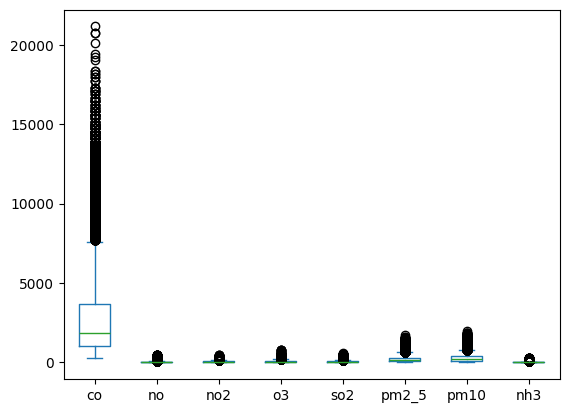

In [34]:
df.plot.box()

In [57]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
df['date'].min()

Timestamp('2020-11-25 01:00:00')

In [45]:
df['date'].max()

Timestamp('2023-01-24 08:00:00')

In [46]:
df['date'].std()

Timedelta('227 days 16:40:39.173881276')

In [60]:
# Extract numerical columns (excluding 'date')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame with normalized numerical data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)

# Concatenate 'Date' column with the normalized numerical data
normalized_df = pd.concat([df['date'], normalized_df], axis=1)

print("Normalized DataFrame:")
print(normalized_df)

Normalized DataFrame:
                     date        co        no       no2        o3       so2  \
0     2020-11-25 01:00:00  0.112816  0.004354  0.145330  0.016964  0.058077   
1     2020-11-25 02:00:00  0.161393  0.046437  0.185892  0.000412  0.085471   
2     2020-11-25 03:00:00  0.204858  0.105357  0.209931  0.001386  0.110376   
3     2020-11-25 04:00:00  0.204858  0.101782  0.233948  0.008039  0.126962   
4     2020-11-25 05:00:00  0.197188  0.085723  0.248981  0.021433  0.143566   
...                   ...       ...       ...       ...       ...       ...   
18771 2023-01-24 04:00:00  0.071908  0.009267  0.071723  0.041518  0.043980   
18772 2023-01-24 05:00:00  0.070630  0.013621  0.067231  0.058033  0.050611   
18773 2023-01-24 06:00:00  0.079578  0.016298  0.078494  0.070541  0.066379   
18774 2023-01-24 07:00:00  0.052733  0.018075  0.106280  0.089291  0.165147   
18775 2023-01-24 08:00:00  0.041866  0.017197  0.115287  0.100001  0.183404   

          pm2_5      pm10    

<Axes: >

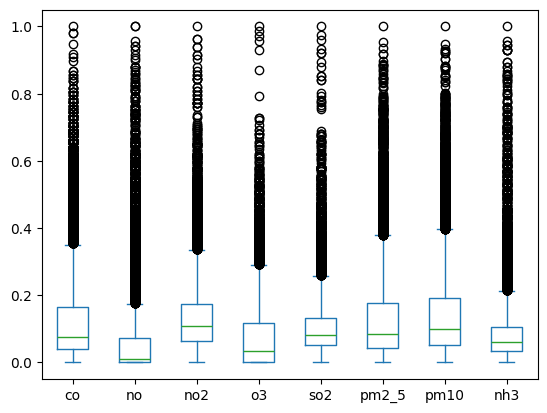

In [61]:
normalized_df.plot.box()

In [64]:
normalized_df.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2021-12-23 14:35:34.384320256,0.127769,0.067230,0.135735,0.075330,0.106937,0.133411,0.145802,0.087257
min,2020-11-25 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-06-09 14:45:00,0.038671,0.001358,0.064973,0.000424,0.051446,0.042806,0.053061,0.033464
50%,2021-12-22 04:30:00,0.075743,0.010486,0.109283,0.033929,0.082982,0.085845,0.099565,0.060743
75%,2022-07-07 18:15:00,0.163950,0.071423,0.173884,0.116067,0.133611,0.177549,0.190753,0.105640
max,2023-01-24 08:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.136656,0.124085,0.106341,0.100444,0.086044,0.133549,0.136667,0.091747


In [65]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


<Axes: ylabel='Frequency'>

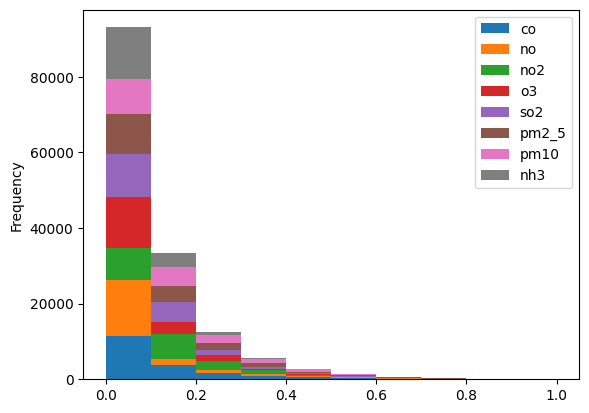

In [66]:
normalized_df.plot.hist(stacked = True)

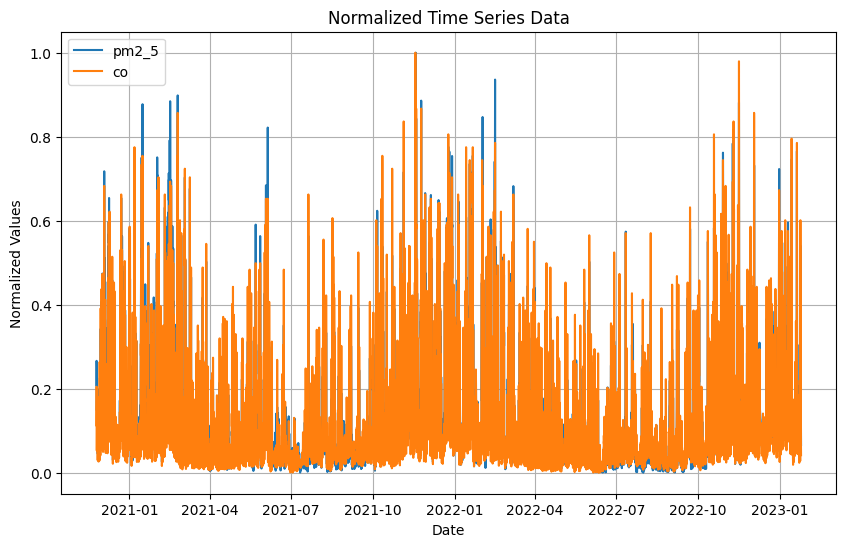

In [68]:
# Plotting the time series data
plt.figure(figsize=(10, 6))

# Plotting 'Feature_1'
plt.plot(normalized_df['date'], normalized_df['pm2_5'], label='pm2_5')

# Plotting 'Feature_2'
plt.plot(normalized_df['date'], normalized_df['co'], label='co')

plt.title('Normalized Time Series Data')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()